Tri Cities Model

In [1]:
import numpy as np
from scipy import linalg
import pandas as pd
import networkx as nx
from numpy import random
import inspect
import sys
import weakref
from EpiCommute import SIRModel
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(precision = 5, suppress = True, linewidth = 100)
from IPython.display import clear_output, display
from ipywidgets import interactive, interact

# Declare Objects

In [2]:
#Highway is a class that holds the weight of the pathway between cities and all of the connections formed by the highway
class Highway:
    instances=[]
    def __init__(self,name,weight=0,cities=np.array([[]])):
        self.__class__.instances.append(self)
        self.name=name
        self.weight=weight
        self.cities=cities
    


In [3]:
#City simply holds the population and location of each city
class City:
    instances=[]
    def __init__(self,name,pop=0,loc=[0,0]):
        self.__class__.instances.append(self)
        self.name=name
        self.pop=pop
        self.loc=loc
        

In [4]:
#Declaring Cities(populations and locations are accurate)
Johnson_City = City('Johnson_City',66515,[36.3345,-82.3703])
Bristol =City('Bristol',26852,[36.5951,-82.1887])
Jonesborough = City('Jonesborough',5247,[36.2943,-82.4735])
Elizabethton = City('Elizabethton',13577,[36.3487,-82.2107])
Gray= City('Gray',1016,[36.4172,-82.4720])
Kingsport = City('Kingsport',53376,[36.5484,-82.5618])
#Declaring Highways
I_26 = Highway('I_26',63665,np.array([['Kingsport','Gray'],['Gray','Johnson_City']]))
I_81 = Highway('I_81',40277,np.array([['Gray','Bristol']]))
Three_21=Highway('Three_21',26322,np.array([['Jonesborough','Johnson_City'],['Johnson_City','Elizabethton']]))
Nineteen_e = Highway('Nineteen_e',9370,np.array([['Elizabethton','Bristol']]))
Eleven_w = Highway('Eleven_w',16644,np.array([['Kingsport','Bristol']]))
Seventy_Five=Highway('Seventy_Five',5762,np.array([['Gray','Jonesborough']]))

In [5]:
# Create a list of all objects of the class city
Pre_City_List=[]
for instance in City.instances:
    Pre_City_List.append(instance.name)
# Remove duplicates
    City_List=[]
for i in Pre_City_List:
    if i not in City_List:
        City_List.append(i)



In [6]:
Pre_Highway_List=[]
for instance in Highway.instances:
    Pre_Highway_List.append(instance.name)
#Remove duplicates
    Highway_List=[]
for i in Pre_Highway_List:
    if i not in Highway_List:
        Highway_List.append(i)
Highway_List

['I_26', 'I_81', 'Three_21', 'Nineteen_e', 'Eleven_w', 'Seventy_Five']

# Model setup

## Create Graph




In [7]:
from numpy import random
#Create Tri_Cities Graph
Tri_Cities = nx.Graph()
#Nodes are connected with self via random weights


In [8]:
# Populate the graph with weighted edges using the list of highways
for a in range(len(Highway_List)):
    HW=globals()[Highway_List[a]]
    for b in range(len(HW.cities)):
        Tri_Cities.add_edge(HW.cities[b][0],HW.cities[b][1],weight=1)
list(Tri_Cities.nodes)[0]

'Kingsport'

In [9]:
pop_array=np.zeros(len(Tri_Cities.nodes))
for a in range(len(Tri_Cities.nodes)):
    pop_array[a]=eval(list(Tri_Cities.nodes)[a]).pop
pop_array    

array([53376.,  1016., 66515., 26852.,  5247., 13577.])

## Mobility

In [10]:
norm_pop = pop_array/sum(pop_array)
mobility_1=nx.adj_matrix(Tri_Cities).toarray()
mobility_t=np.zeros((6,6))
for a in range(6):
    mobility_t[a,:]=mobility_1[a]/sum(mobility_1[a])
mobility_t
difff= 3
for z in range(500):
    rand=pop_array*.1*z/max(pop_array)
    mobility_2 =mobility_t+np.diag(rand)
    mobility_2
    for a in range(6):
        mobility_2[a,:]=mobility_2[a,:]/sum(mobility_2[a,:])
    eigs=np.linalg.eig(mobility_2.T)
    whereat=np.where(abs(eigs[0]-1)<.01)[0][0]
    stab_dist=eigs[1][:,whereat]/sum(eigs[1][:,whereat])
    if(sum((stab_dist-norm_pop)*(stab_dist-norm_pop))<difff):
        answer=rand
        difff=sum((stab_dist-norm_pop)*(stab_dist-norm_pop))
    
mobility_2=mobility_t +np.diag(answer)
for a in range(6):
    mobility_2[a,:]=mobility_2[a,:]/sum(mobility_2[a,:])
mobility_2



array([[0.96654, 0.01673, 0.     , 0.01673, 0.     , 0.     ],
       [0.1613 , 0.35479, 0.1613 , 0.1613 , 0.1613 , 0.     ],
       [0.     , 0.00901, 0.97297, 0.     , 0.00901, 0.00901],
       [0.02146, 0.02146, 0.     , 0.93562, 0.     , 0.02146],
       [0.     , 0.13021, 0.13021, 0.     , 0.73957, 0.     ],
       [0.     , 0.     , 0.05989, 0.05989, 0.     , 0.88022]])

In [11]:
# outbreak source is city of our choice
City_List=list(Tri_Cities.nodes())

# Generate multiple results with varying r0/mu
examples={}
variations=100
muvar=.2

for a in range(variations):
        for c in range(6):
            model = SIRModel(
            mobility_2,
            pop_array,
            outbreak_source=c,
            mu=.025+a*muvar/variations,
            R0=5.8,         
            dt=0.1,                   # simulation time interval
            dt_save=1,                # time interval when to save observables
            I0=400,
            T_max=200,# number of initial infected
            VERBOSE=True              # print verbose output
       )
            examples[City_List[c]+str(a)]=model.run_simulation()

        


Starting Simulation ...
Simulation completed
Time: 0min 4.67s
Starting Simulation ...
Simulation completed
Time: 0min 5.25s
Starting Simulation ...
Simulation completed
Time: 0min 4.59s
Starting Simulation ...
Simulation completed
Time: 0min 4.95s
Starting Simulation ...
Simulation completed
Time: 0min 4.94s
Starting Simulation ...
Simulation completed
Time: 0min 5.02s
Starting Simulation ...
Simulation completed
Time: 0min 5.36s
Starting Simulation ...
Simulation completed
Time: 0min 4.59s
Starting Simulation ...
Simulation completed
Time: 0min 4.49s
Starting Simulation ...
Simulation completed
Time: 0min 7.01s
Starting Simulation ...
Simulation completed
Time: 0min 5.52s
Starting Simulation ...
Simulation completed
Time: 0min 5.15s
Starting Simulation ...
Simulation completed
Time: 0min 5.18s
Starting Simulation ...
Simulation completed
Time: 0min 5.12s
Starting Simulation ...
Simulation completed
Time: 0min 5.28s
Starting Simulation ...
Simulation completed
Time: 0min 4.85s
Starting

Simulation completed
Time: 0min 4.94s
Starting Simulation ...
Simulation completed
Time: 0min 4.29s
Starting Simulation ...
Simulation completed
Time: 0min 4.32s
Starting Simulation ...
Simulation completed
Time: 0min 4.69s
Starting Simulation ...
Simulation completed
Time: 0min 4.16s
Starting Simulation ...
Simulation completed
Time: 0min 4.63s
Starting Simulation ...
Simulation completed
Time: 0min 4.43s
Starting Simulation ...
Simulation completed
Time: 0min 4.76s
Starting Simulation ...
Simulation completed
Time: 0min 4.97s
Starting Simulation ...
Simulation completed
Time: 0min 4.49s
Starting Simulation ...
Simulation completed
Time: 0min 4.62s
Starting Simulation ...
Simulation completed
Time: 0min 4.86s
Starting Simulation ...
Simulation completed
Time: 0min 4.84s
Starting Simulation ...
Simulation completed
Time: 0min 4.92s
Starting Simulation ...
Simulation completed
Time: 0min 4.99s
Starting Simulation ...
Simulation completed
Time: 0min 4.76s
Starting Simulation ...
Simulati

Simulation completed
Time: 0min 2.76s
Starting Simulation ...
Simulation completed
Time: 0min 2.85s
Starting Simulation ...
Simulation completed
Time: 0min 3.33s
Starting Simulation ...
Simulation completed
Time: 0min 3.04s
Starting Simulation ...
Simulation completed
Time: 0min 2.80s
Starting Simulation ...
Simulation completed
Time: 0min 2.59s
Starting Simulation ...
Simulation completed
Time: 0min 2.71s
Starting Simulation ...
Simulation completed
Time: 0min 2.71s
Starting Simulation ...
Simulation completed
Time: 0min 3.18s
Starting Simulation ...
Simulation completed
Time: 0min 3.14s
Starting Simulation ...
Simulation completed
Time: 0min 3.21s
Starting Simulation ...
Simulation completed
Time: 0min 2.66s
Starting Simulation ...
Simulation completed
Time: 0min 2.40s
Starting Simulation ...
Simulation completed
Time: 0min 2.75s
Starting Simulation ...
Simulation completed
Time: 0min 2.55s
Starting Simulation ...
Simulation completed
Time: 0min 2.72s
Starting Simulation ...
Simulati

Simulation completed
Time: 0min 1.94s
Starting Simulation ...
Simulation completed
Time: 0min 2.31s
Starting Simulation ...
Simulation completed
Time: 0min 2.40s
Starting Simulation ...
Simulation completed
Time: 0min 2.57s
Starting Simulation ...
Simulation completed
Time: 0min 2.03s
Starting Simulation ...
Simulation completed
Time: 0min 1.97s
Starting Simulation ...
Simulation completed
Time: 0min 2.17s
Starting Simulation ...
Simulation completed
Time: 0min 2.25s
Starting Simulation ...
Simulation completed
Time: 0min 1.98s
Starting Simulation ...
Simulation completed
Time: 0min 2.02s
Starting Simulation ...
Simulation completed
Time: 0min 1.87s
Starting Simulation ...
Simulation completed
Time: 0min 1.86s
Starting Simulation ...
Simulation completed
Time: 0min 2.42s
Starting Simulation ...
Simulation completed
Time: 0min 2.11s
Starting Simulation ...
Simulation completed
Time: 0min 2.43s
Starting Simulation ...
Simulation completed
Time: 0min 2.02s
Starting Simulation ...
Simulati

Simulation completed
Time: 0min 1.69s
Starting Simulation ...
Simulation completed
Time: 0min 1.76s
Starting Simulation ...
Simulation completed
Time: 0min 1.57s
Starting Simulation ...
Simulation completed
Time: 0min 1.83s
Starting Simulation ...
Simulation completed
Time: 0min 1.85s
Starting Simulation ...
Simulation completed
Time: 0min 1.72s
Starting Simulation ...
Simulation completed
Time: 0min 2.40s
Starting Simulation ...
Simulation completed
Time: 0min 1.66s
Starting Simulation ...
Simulation completed
Time: 0min 2.17s
Starting Simulation ...
Simulation completed
Time: 0min 2.00s
Starting Simulation ...
Simulation completed
Time: 0min 1.45s
Starting Simulation ...
Simulation completed
Time: 0min 1.47s
Starting Simulation ...
Simulation completed
Time: 0min 1.54s
Starting Simulation ...
Simulation completed
Time: 0min 1.56s
Starting Simulation ...
Simulation completed
Time: 0min 1.78s
Starting Simulation ...
Simulation completed
Time: 0min 1.83s
Starting Simulation ...
Simulati

In [12]:
names=list(examples)
result=examples['Johnson_City1']

# Results

## Epidemic curve

In [13]:
maxsensitivities=np.zeros((6,variations-1))
infectedsensitivities=np.zeros((6,variations-1))
endsensitivities=np.zeros((6,variations-1))
for a in range(6):
    for b in range(variations-1):
        currentI=examples[City_List[a]+str(b)]['I_total']
        upperI=examples[City_List[a]+str(b+1)]['I_total']
        currentR=examples[City_List[a]+str(b)]['R_total']
        upperR=examples[City_List[a]+str(b+1)]['R_total'] 
        currenthl= 2*np.where(np.cumsum(currentI)<.5*np.cumsum(currentI)[len(currentI)-1])[0][-1]
        upperhl= 2*np.where(np.cumsum(upperI)<.5*np.cumsum(upperI)[len(upperI)-1])[0][-1]
        maxsensitivities[a,b]=(max(upperI)-max(currentI))*variations/muvar
        infectedsensitivities[a,b]=(upperR[-1]-currentR[-1])*variations/muvar
        endsensitivities[a,b]=(upperhl-currenthl)*variations/muvar
infectedsensitivities 

array([[10.06117,  3.90801,  2.98654,  2.62935,  1.19762,  0.90647,  1.05354,  0.28815,  0.33317,
         0.12306,  0.29115, -0.01801,  0.27614, -0.08704,  0.02401,  0.06603, -0.08404,  0.05403,
        -0.03002,  0.14107,  0.06303, -0.06303, -0.12606,  0.06603, -0.003  , -0.09305, -0.02101,
         0.08704,  0.     ,  0.04202,  0.05103, -0.10205,  0.07204,  0.03902, -0.13507,  0.06003,
         0.009  ,  0.09605, -0.04202, -0.11106,  0.16809, -0.07204,  0.10505, -0.1951 ,  0.     ,
         0.03002, -0.06904,  0.1861 , -0.15908,  0.23412, -0.1981 ,  0.06603,  0.04502,  0.04502,
        -0.15608,  0.10205, -0.18309,  0.06904, -0.09905,  0.14708,  0.05703, -0.10505,  0.009  ,
         0.07204, -0.06003, -0.05403,  0.03902,  0.09005, -0.03602, -0.09305,  0.05703, -0.05403,
         0.14708, -0.05403,  0.01201, -0.06904,  0.02701, -0.006  ,  0.14107, -0.14107, -0.01201,
        -0.04502,  0.24312, -0.08104, -0.21911,  0.2011 ,  0.006  , -0.06904,  0.12306, -0.15608,
         0.10505, -0

Text(0, 0.5, 'ΔMI/ Δμ')

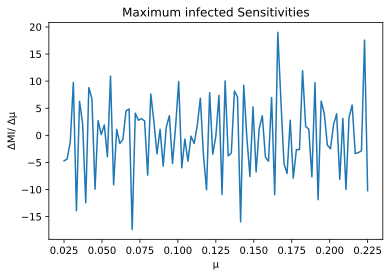

In [37]:
import matplotlib
import matplotlib.pyplot as plt
x=np.linspace(.025,.225,variations-1)
fig=plt.figure()
plt.plot(x,maxsensitivities[2])
plt.title("Maximum infected Sensitivities")

plt.xlabel("\u03BC")
plt.ylabel( '\u0394MI/ \u0394\u03BC')

Text(0, 0.5, 'ΔT/ Δμ')

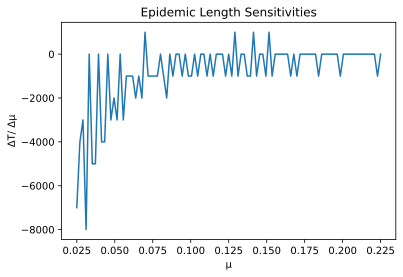

In [39]:
x=np.linspace(.025,.225,variations-1)
fig=plt.figure()
plt.plot(x,endsensitivities[2])
plt.title("Epidemic Length Sensitivities")

plt.xlabel("\u03BC")
plt.ylabel( '\u0394T/ \u0394\u03BC')

Text(0, 0.5, 'ΔI/ Δμ')

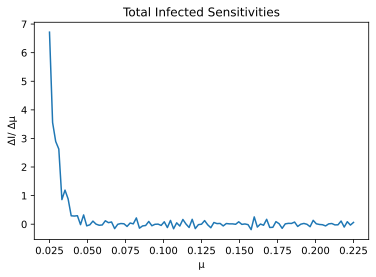

In [38]:
x=np.linspace(.025,.225,variations-1)
fig=plt.figure()
plt.plot(x,infectedsensitivities[2])
plt.title("Total Infected Sensitivities")

plt.xlabel("\u03BC")
plt.ylabel( '\u0394I/ \u0394\u03BC')

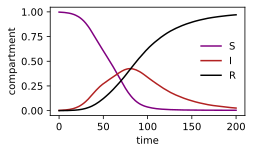

In [17]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rc('figure', dpi=200)
#plot SIR.
figure = plt.figure(figsize=(3.5,2))
plt.plot(result['t'], result['S_total'], label='S', color='purple')
plt.plot(result['t'], result['I_total'], label='I', color='firebrick')
plt.plot(result['t'], result['R_total'], label='R', color='k')
plt.legend(frameon=False, loc='center right')
plt.xlabel("time")
plt.ylabel("compartment")
plt.show()

## Spread of infected

In [18]:
citylocations=np.zeros((6,2))
for a in range(6):
    citylocations[a,:]= globals()[list(Tri_Cities.nodes)[a]].loc
#City locations listed in same order as result array so cities can be labelled
citylocations

array([[ 36.5484, -82.5618],
       [ 36.4172, -82.472 ],
       [ 36.3345, -82.3703],
       [ 36.5951, -82.1887],
       [ 36.2943, -82.4735],
       [ 36.3487, -82.2107]])

In [19]:
names

['Kingsport0',
 'Gray0',
 'Johnson_City0',
 'Bristol0',
 'Jonesborough0',
 'Elizabethton0',
 'Kingsport1',
 'Gray1',
 'Johnson_City1',
 'Bristol1',
 'Jonesborough1',
 'Elizabethton1',
 'Kingsport2',
 'Gray2',
 'Johnson_City2',
 'Bristol2',
 'Jonesborough2',
 'Elizabethton2',
 'Kingsport3',
 'Gray3',
 'Johnson_City3',
 'Bristol3',
 'Jonesborough3',
 'Elizabethton3',
 'Kingsport4',
 'Gray4',
 'Johnson_City4',
 'Bristol4',
 'Jonesborough4',
 'Elizabethton4',
 'Kingsport5',
 'Gray5',
 'Johnson_City5',
 'Bristol5',
 'Jonesborough5',
 'Elizabethton5',
 'Kingsport6',
 'Gray6',
 'Johnson_City6',
 'Bristol6',
 'Jonesborough6',
 'Elizabethton6',
 'Kingsport7',
 'Gray7',
 'Johnson_City7',
 'Bristol7',
 'Jonesborough7',
 'Elizabethton7',
 'Kingsport8',
 'Gray8',
 'Johnson_City8',
 'Bristol8',
 'Jonesborough8',
 'Elizabethton8',
 'Kingsport9',
 'Gray9',
 'Johnson_City9',
 'Bristol9',
 'Jonesborough9',
 'Elizabethton9',
 'Kingsport10',
 'Gray10',
 'Johnson_City10',
 'Bristol10',
 'Jonesborough10',
 

In [20]:
result=examples[names[1]]
r_2=np.array(result['I_total'])


In [21]:
cities={}
stds={}
means={}
endvec=np.zeros(len(names))
for a in range(len(names)):
    result=examples[names[a]]
    r_2 = np.array(result['I_total'])
    r_2=r_2[np.where(r_2==max(r_2))[0][0]:len(r_2)]
    endvec[a]=np.where(r_2==max(r_2))[0][0]+np.where(r_2<0.1)[0][0] 
print(endvec)  
stds['endvecstd']=np.std(endvec)
means['endvecmean']=np.mean(endvec)
maxvec=np.zeros(len(names))

for a in range(len(names)):
    result=examples[names[a]]
    r_2 = np.array(result['I_total'])
    maxvec[a]=max(r_2)
print(maxvec)
stds['maxvecstd']=np.std(maxvec)
means['maxvecmean']=np.mean(maxvec)
infectedvec=np.zeros(len(names))
for a in range(len(names)):
    result=examples[names[a]]
    r_2 = np.array(result['I_total'])
    infectedvec[a]=sum(r_2)
print(infectedvec)
stds['infectedvecstd']=np.std(infectedvec)
means['infectedvecmean']=np.mean(infectedvec)
for a2 in range(6):
    nameend=list(Tri_Cities.nodes())[a2]+'endvec'
    globals()[nameend]=np.zeros(len(names))
    for a in range(len(names)):
        result=examples[names[a]]
        r_2 = np.array(result['I']).T[a2]
        r_2[np.where(r_2==max(r_2))[0][0]:len(r_2)]
        globals()[nameend][a]=np.where(r_2==max(r_2))[0][0]+np.where(r_2<0.1)[0][0] 
    print(globals()[nameend])  
    cities[nameend]=globals()[nameend]
    stds[nameend+'std']=np.std(globals()[nameend])
    means[nameend+'mean']=np.std(globals()[nameend])
    namemax=list(Tri_Cities.nodes())[a2]+'maxvec'
    globals()[namemax]=np.zeros(len(names))
    for a in range(len(names)):
        result=examples[names[a]]
        r_2 = np.array(result['I']).T[a2]
        globals()[namemax][a]=max(r_2)
    print(globals()[namemax])
    cities[namemax]=globals()[namemax]
    infectedname = list(Tri_Cities.nodes())[a2]+'infectedvec'
    stds[namemax+'std']=np.std(globals()[namemax])
    means[namemax+'mean']=np.std(globals()[namemax])
    globals()[infectedname]=np.zeros(len(names))
    for a in range(len(names)):
        result=examples[names[a]]
        r_2 = np.array(result['I']).T[a2]
        globals()[infectedname][a]=sum(r_2)
    print(globals()[infectedname])
    cities[infectedname]=globals()[infectedname]
    stds[infectedname+'std']=np.std(globals()[infectedname])
    means[infectedname+'mean']=np.std(globals()[infectedname])

[74. 83. 76. 77. 81. 79. 71. 76. 71. 73. 75. 72. 66. 71. 63. 67. 70. 67. 60. 66. 60. 63. 66. 65.
 59. 63. 59. 59. 62. 60. 52. 59. 53. 56. 58. 56. 51. 56. 51. 54. 55. 54. 49. 53. 48. 51. 51. 50.
 46. 50. 44. 48. 50. 48. 45. 48. 43. 46. 47. 46. 42. 46. 41. 44. 46. 44. 41. 44. 39. 41. 44. 42.
 38. 42. 38. 40. 42. 40. 37. 40. 37. 38. 40. 38. 35. 39. 36. 37. 38. 38. 35. 37. 33. 35. 37. 36.
 33. 37. 34. 34. 36. 35. 32. 35. 31. 34. 35. 33. 30. 34. 31. 33. 34. 33. 30. 33. 30. 32. 32. 31.
 29. 32. 29. 30. 32. 31. 29. 31. 29. 29. 31. 30. 28. 30. 27. 28. 30. 28. 27. 29. 26. 28. 29. 28.
 27. 28. 25. 27. 28. 28. 26. 28. 25. 26. 28. 27. 25. 27. 24. 26. 27. 25. 24. 26. 24. 26. 26. 25.
 23. 26. 23. 24. 25. 24. 23. 26. 23. 24. 24. 24. 22. 25. 23. 23. 24. 24. 22. 24. 22. 23. 24. 23.
 22. 24. 22. 23. 23. 23. 21. 23. 21. 22. 23. 22. 21. 23. 20. 21. 22. 22. 19. 22. 20. 21. 22. 21.
 20. 22. 19. 21. 21. 21. 20. 21. 20. 20. 21. 20. 19. 21. 19. 19. 20. 20. 19. 20. 19. 19. 20. 19.
 18. 20. 18. 19. 20. 19. 17. 2

[38.74955 38.76019 37.47416 38.31585 38.06555 37.0879  36.40528 35.98258 35.20073 36.03934 35.9262
 35.43465 34.12522 33.87837 33.41423 33.98458 33.94942 33.42227 32.03202 31.88379 31.47216 31.85677
 32.04641 31.71538 30.13429 30.109   29.91168 29.66588 29.7625  29.77404 28.58455 28.28468 28.15593
 28.4324  28.36983 28.31467 27.04946 26.71969 26.90483 27.01855 26.97962 27.0252  25.71311 25.66245
 25.53322 25.41882 25.55165 25.55384 24.31619 24.17609 24.29187 24.39077 24.49663 24.25337 23.09148
 23.33005 23.22488 23.11634 23.27136 23.2183  22.20324 22.1431  22.26154 22.2292  22.20698 22.21652
 21.20906 21.15899 21.25002 21.05649 21.35673 21.27969 20.35212 20.343   20.30248 20.59388 20.33315
 20.28099 19.58386 19.57633 19.52876 19.57209 19.65175 19.54646 18.83453 18.81434 18.78198 18.73316
 18.71139 18.79208 18.10692 18.16417 18.23636 18.04809 18.20976 18.26926 17.63025 17.62093 17.54985
 17.48653 17.47707 17.54075 16.91341 16.92191 16.89448 16.88382 16.87521 17.00954 16.34531 16.34433
 

[38.40551 38.67323 39.6063  38.53248 39.7687  37.72736 33.73425 36.64173 37.31299 35.19291 38.74606
 36.80413 32.50591 34.40059 35.15256 33.93996 34.80807 32.66929 32.35039 31.03543 31.31988 30.48622
 30.69685 32.09744 29.85531 28.77264 32.30807 30.30413 30.48524 30.45177 27.96654 28.32776 29.74213
 28.50295 29.4252  28.56693 28.64764 26.52854 26.15945 26.48228 25.9124  26.81693 24.07874 25.86909
 26.9124  25.17618 27.46358 26.83465 24.00098 24.38386 23.97638 24.30118 24.10531 24.81102 24.12992
 23.59055 24.42618 21.42618 22.71752 23.35039 22.54429 22.29134 22.39764 22.88287 22.25984 21.86614
 21.24016 21.50295 21.57283 20.72835 20.93701 20.55118 20.71752 20.98228 19.56496 19.66437 19.86909
 20.33268 20.25591 19.55512 18.78543 19.58169 19.1998  18.92618 18.79429 19.84154 18.40059 18.51181
 19.03445 18.80118 18.71949 18.77559 17.68406 19.56102 18.52657 18.09941 17.45669 17.3248  18.48622
 17.25886 18.07776 17.46457 17.27559 17.03445 17.49705 17.78642 16.95669 16.35531 16.54429 16.87795


[79. 66. 89. 51. 78. 68. 72. 63. 81. 48. 75. 65. 65. 56. 77. 44. 72. 63. 62. 53. 76. 41. 67. 57.
 59. 51. 68. 39. 61. 55. 53. 48. 68. 37. 58. 50. 52. 46. 59. 35. 55. 47. 49. 42. 59. 34. 53. 47.
 46. 41. 58. 32. 50. 44. 45. 39. 56. 31. 50. 41. 44. 38. 51. 29. 47. 39. 40. 36. 51. 27. 44. 37.
 39. 35. 47. 27. 41. 37. 38. 34. 45. 25. 41. 34. 35. 31. 43. 24. 38. 33. 35. 32. 44. 24. 37. 33.
 34. 30. 41. 23. 35. 30. 32. 29. 38. 23. 36. 29. 31. 27. 38. 21. 34. 29. 31. 27. 38. 20. 33. 28.
 30. 26. 36. 20. 31. 27. 30. 25. 35. 19. 31. 26. 28. 24. 33. 20. 29. 25. 27. 24. 33. 18. 28. 25.
 27. 23. 32. 18. 28. 24. 25. 22. 32. 18. 28. 24. 25. 23. 30. 17. 27. 22. 25. 22. 31. 16. 26. 22.
 24. 22. 30. 16. 25. 21. 23. 20. 29. 16. 26. 21. 22. 20. 27. 15. 24. 21. 22. 20. 27. 15. 24. 20.
 22. 19. 26. 15. 24. 20. 22. 19. 26. 14. 23. 20. 20. 18. 26. 14. 23. 19. 21. 18. 25. 14. 22. 19.
 21. 17. 24. 13. 21. 18. 20. 17. 24. 12. 21. 18. 19. 17. 22. 13. 20. 17. 19. 16. 22. 12. 20. 18.
 18. 16. 23. 12. 21. 17. 19. 1

[0.50753 0.50791 0.53307 0.53116 0.49057 0.53897 0.498   0.51382 0.52449 0.50962 0.49952 0.52563
 0.51782 0.50905 0.51706 0.52392 0.48999 0.54755 0.51458 0.51896 0.52773 0.52544 0.50772 0.5264
 0.51725 0.51973 0.54679 0.52392 0.48999 0.5405  0.50943 0.52849 0.53421 0.52525 0.50943 0.51915
 0.50219 0.50924 0.52697 0.51725 0.49457 0.53307 0.52239 0.51172 0.52354 0.53802 0.50658 0.52659
 0.5081  0.51191 0.51992 0.53097 0.51248 0.52887 0.52239 0.51858 0.53116 0.52201 0.49323 0.53135
 0.50982 0.51515 0.53288 0.53192 0.51229 0.51915 0.51687 0.51725 0.53307 0.52792 0.49362 0.52563
 0.51077 0.50924 0.54298 0.53059 0.49209 0.52906 0.49971 0.50353 0.52449 0.52811 0.51782 0.52525
 0.50886 0.52335 0.5283  0.50924 0.50162 0.52945 0.51153 0.51915 0.51744 0.51973 0.51363 0.53612
 0.49933 0.51553 0.53383 0.50753 0.4898  0.53535 0.50505 0.51115 0.51534 0.52735 0.50029 0.52601
 0.51134 0.51534 0.51858 0.53726 0.49724 0.52068 0.52049 0.51763 0.53383 0.53021 0.49895 0.53078
 0.51306 0.50353 0.51344 0.5262

[37.59682 38.48052 38.41813 38.54386 37.80202 39.13641 35.37401 36.49606 36.54276 36.16904 35.94063
 36.35199 33.5278  33.72814 34.05384 33.78721 33.34463 34.23164 31.73396 31.81196 31.9561  31.66281
 31.31745 31.97238 30.11969 30.11365 30.6363  29.91508 29.4241  30.33815 28.62252 28.61545 28.39744
 28.87361 28.59152 28.24129 26.4459  26.89048 26.78427 26.86337 27.05826 26.97334 25.5337  25.72741
 25.4501  25.36473 25.36761 25.41592 24.35214 24.19614 24.16815 24.1507  24.15283 24.51499 23.48833
 23.30559 23.33837 23.09435 23.24718 23.48825 22.33549 22.26457 22.07616 21.73345 22.16189 22.12322
 21.24556 21.1177  20.91184 21.29263 21.16697 21.17574 20.55793 19.99676 20.33616 20.28077 20.49842
 20.11343 19.63608 19.53738 19.45909 19.46328 19.37357 19.76637 18.75311 18.87022 18.67541 18.47617
 18.91427 19.18222 18.2133  18.17375 18.34485 18.26788 18.07424 18.31583 17.55145 17.44605 17.65758
 17.6564  17.29668 17.71525 17.05414 17.28114 16.92082 16.99897 16.99271 16.93592 16.39346 16.53789


In [22]:
list(Tri_Cities.nodes())[0]

'Kingsport'

In [23]:
names_2 = ['endvec','maxvec','infectedvec']
intervals={}
for a in range(3):
    intervals[names_2[a] + 'interval']= [means[names_2[a]+'mean']-1.96*stds[names_2[a]+'std'],means[names_2[a]+'mean']+1.96*stds[names_2[a]+'std']]
 
for a in range(3):
    for b in range(6):
        upper=means[list(Tri_Cities.nodes())[b]+names_2[a]+'mean']+1.96*stds[list(Tri_Cities.nodes())[b]+names_2[a]+'std']
        lower=means[list(Tri_Cities.nodes())[b]+names_2[a]+'mean']-1.96*stds[list(Tri_Cities.nodes())[b]+names_2[a]+'std']
        intervals[list(Tri_Cities.nodes())[b]+names_2[a] + 'interval']=[lower,upper] 
intervals        

{'endvecinterval': [-7.7508183457796385, 52.17748501244631],
 'maxvecinterval': [0.3891165763514694, 0.5344224427043253],
 'infectedvecinterval': [-3.882715465851561, 26.159907702661275],
 'Kingsportendvecinterval': [-15.797309421543911, 48.708370716427055],
 'Grayendvecinterval': [-17.024323605946872, 52.49166445166952],
 'Johnson_Cityendvecinterval': [-15.284530511598973, 47.1273024107635],
 'Bristolendvecinterval': [-14.258073923219785, 43.962394596594336],
 'Jonesboroughendvecinterval': [-13.826121966770003, 42.630542730874176],
 'Elizabethtonendvecinterval': [-14.833357521478405, 45.73618569122508],
 'Kingsportmaxvecinterval': [-0.003449225796604936, 0.01063511287286522],
 'Graymaxvecinterval': [-0.02215179798310529, 0.06830137711457464],
 'Johnson_Citymaxvecinterval': [-0.0029532151364425664, 0.009105746670697914],
 'Bristolmaxvecinterval': [-0.004972600829948574, 0.015332185892341437],
 'Jonesboroughmaxvecinterval': [-0.013573454465164852, 0.041851484600924964],
 'Elizabethtonma

In [24]:
musensitivityend=np.array([])
for a in range(variations-1):
        for c in range(6):
            r_1 = np.array(examples[City_List[c]+str(a+1)]['I_total'])
            r_2 = np.array(examples[City_List[c]+str(a)]['I_total'])
            r_1=r_1[np.where(r_1==max(r_1))[0][0]:len(r_1)]
            higher=np.where(r_1==max(r_1))[0][0]+np.where(r_1<.1)[0][0]
            r_2=r_2[np.where(r_2==max(r_2))[0][0]:len(r_2)]
            lower=np.where(r_2==max(r_2))[0][0]+np.where(r_2<.1)[0][0]
            musensitivityend= np.append(musensitivityend,(higher-lower)*variations/muvar) 
musensitivityendconstant=np.mean(musensitivityend)
musensitivityendconstant
musensitivityinf=np.array([])
for a in range(variations-1):
        for c in range(6):
            higher=sum(np.array(examples[City_List[c]+str(a+1)]['I']).T[0])
            lower=sum(np.array(examples[City_List[c]+str(a)]['I']).T[0])
            musensitivityinf= np.append(musensitivityinf,(higher-lower)*variations/muvar) 
musensitivityinfconstant=np.mean(musensitivityinf)
musensitivityinfconstant
musensitivitymax=np.array([])
for a in range(variations-1):
        for c in range(6):
            r_1 = np.array(examples[City_List[c]+str(a+1)]['I_total'])
            r_2 = np.array(examples[City_List[c]+str(a)]['I_total'])
            higher=np.where(r_1==max(r_1))[0][0]
            lower=np.where(r_2==max(r_2))[0][0]
            musensitivitymax= np.append(musensitivitymax,(higher-lower)*variations/muvar) 
musensitivitymaxconstant=np.mean(musensitivitymax)


In [25]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')
%config InlineBackend.figure_format = 'svg'

In [26]:
 poss={}
for a in range(6):
    poss[list(Tri_Cities.nodes())[a]]=citylocations[a,:]
poss    

{'Kingsport': array([ 36.5484, -82.5618]),
 'Gray': array([ 36.4172, -82.472 ]),
 'Johnson_City': array([ 36.3345, -82.3703]),
 'Bristol': array([ 36.5951, -82.1887]),
 'Jonesborough': array([ 36.2943, -82.4735]),
 'Elizabethton': array([ 36.3487, -82.2107])}

In [27]:
lbls={}
for a in range(6):
    lbls[list(Tri_Cities.nodes())[a]]=list(Tri_Cities.nodes())[a]
lbls    

{'Kingsport': 'Kingsport',
 'Gray': 'Gray',
 'Johnson_City': 'Johnson_City',
 'Bristol': 'Bristol',
 'Jonesborough': 'Jonesborough',
 'Elizabethton': 'Elizabethton'}

C:\Users\Bumbulizer\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


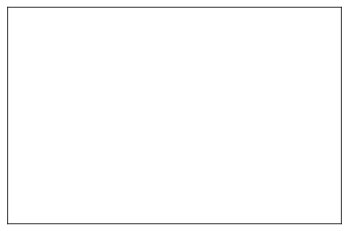

In [28]:
fig = plt.Figure(figsize = (3,3))
ax = fig.add_subplot()

def f(t=0):
    t=2*t
    ax.clear()
    ax.set_title(t)
    ax.set_xlim([36.2,36.7])
    ax.set_ylim([-82.65,-82.1])
    
    nx.draw_networkx(Tri_Cities,poss,
               with_labels = True,
               labels = lbls,
               font_size=8,
               node_size = 50, 
               edge_color = 'gray',
               node_color = result['I'][t],
               cmap = 'Reds', ax  = ax,
               vmin = 0,  vmax = 1)
    


anim =FuncAnimation(fig, f, frames=50, interval=100, 
                     blit=False, repeat=True)
anim


In [29]:
citylocations[:,0]

array([36.5484, 36.4172, 36.3345, 36.5951, 36.2943, 36.3487])

In [30]:
fig = plt.Figure(figsize = (3.5,3.5))
ax = fig.add_subplot()

def f(t=0):
    ax.clear()
    ax.scatter(citylocations[:,0],citylocations[:,1],c=result['I'][t],vmin=0,vmax=1,cmap='Reds')
    ax.set_xlim([36.2,36.8])
    ax.set_ylim([-82.65,-82.1])
    for i, label in enumerate(list(Tri_Cities.nodes())):
        ax.annotate(label, (citylocations[i,0],citylocations[i,1]),size=5)
    


anim =FuncAnimation(fig, f, frames=100, interval=100, 
                     blit=False, repeat=True)
anim

C:\Users\Bumbulizer\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


AttributeError: 'list' object has no attribute 'items'

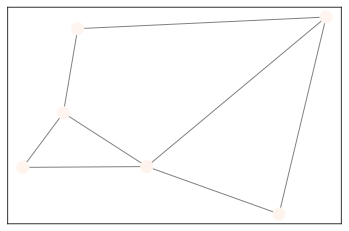

In [31]:
nx.draw_networkx(Tri_Cities,poss,
               with_labels = True,
               labels = list(Tri_Cities.nodes()),
               node_size = 150, 
               edge_color = 'gray',
               node_color = result['I'][30],
               cmap = 'Reds',
               vmin = 0,  vmax = 1)


## Susceptibles

## Arrival times